# Machine Learning with Python

Python has several packages for machine learning. We will use the most popular package:
[scikit learn](https://scikit-learn.org)

In [188]:
import pandas as pd

# data
from sklearn.datasets import load_iris

# learner
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# make plots larger
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,15

## Load data

The iris dataset comes with scikit learn. It contains four measurements for 150 flowers of three subspecies of the iris family. The class attribute is the subspecies. Details can be found on the [Wikipedia page for the iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). We load the data as a pandas dataframe.

In [189]:
iris = load_iris(as_frame = True)
iris['frame']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [190]:
X = iris['data']
y = iris['target']

print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [191]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


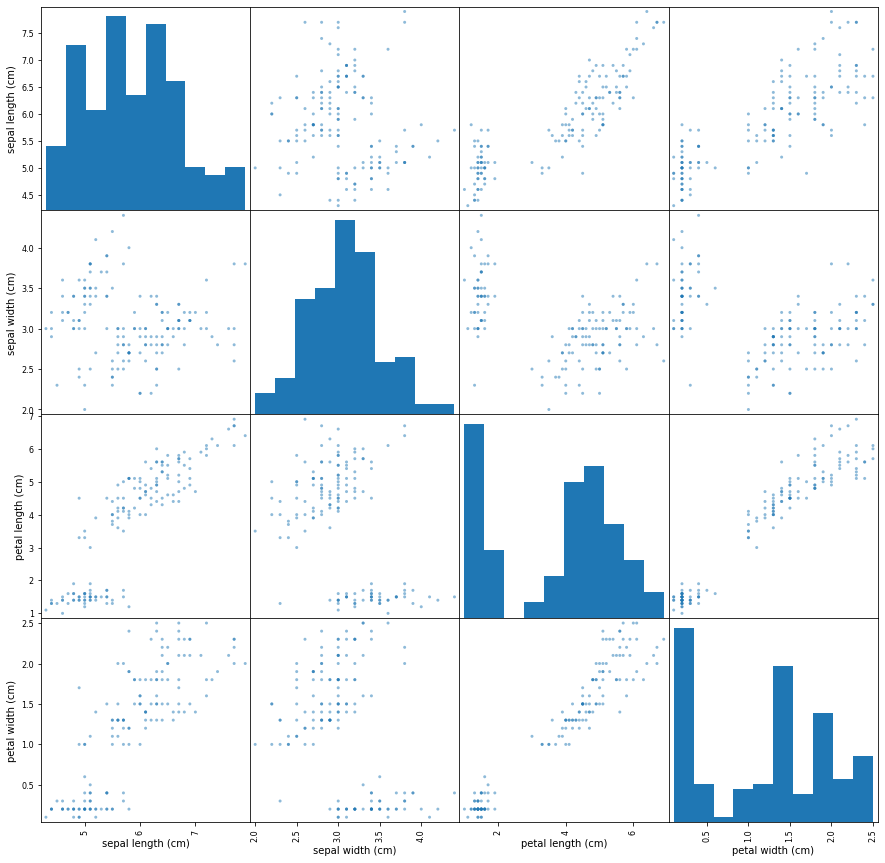

In [192]:
plt = pd.plotting.scatter_matrix(X)

 ## Create a training and test set

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
85                 6.0               3.4                4.5               1.6
107                7.3               2.9                6.3               1.8
35                 5.0               3.2                1.2               0.2
136                6.3               3.4                5.6               2.4
25                 5.0               3.0                1.6               0.2
..                 ...               ...                ...               ...
63                 6.1               2.9                4.7               1.4
15                 5.7               4.4                1.5               0.4
26                 5.0               3.4                1.6               0.4
130                7.4               2.8                6.1               1.9
54                 6.5               2.8                4.6               1.5

[120 rows x 4 columns]


In [194]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
62                 6.0               2.2                4.0               1.0
112                6.8               3.0                5.5               2.1
121                5.6               2.8                4.9               2.0
99                 5.7               2.8                4.1               1.3
141                6.9               3.1                5.1               2.3
13                 4.3               3.0                1.1               0.1
21                 5.1               3.7                1.5               0.4
51                 6.4               3.2                4.5               1.5
135                7.7               3.0                6.1               2.3
126                6.2               2.8                4.8               1.8
133                6.3               2.8                5.1               1.5
86                 6.7               3.1                4.7     

## Learn a decision tree on the training data

scikit-learn uses an optimized version of the CART algorithm. Learning a model in scikit-learn consists of initializing the learner (with hyperparameters, if any) and calling the fit function with the training data. For details and available hyperparameters see: https://scikit-learn.org/stable/modules/tree.html

In [195]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

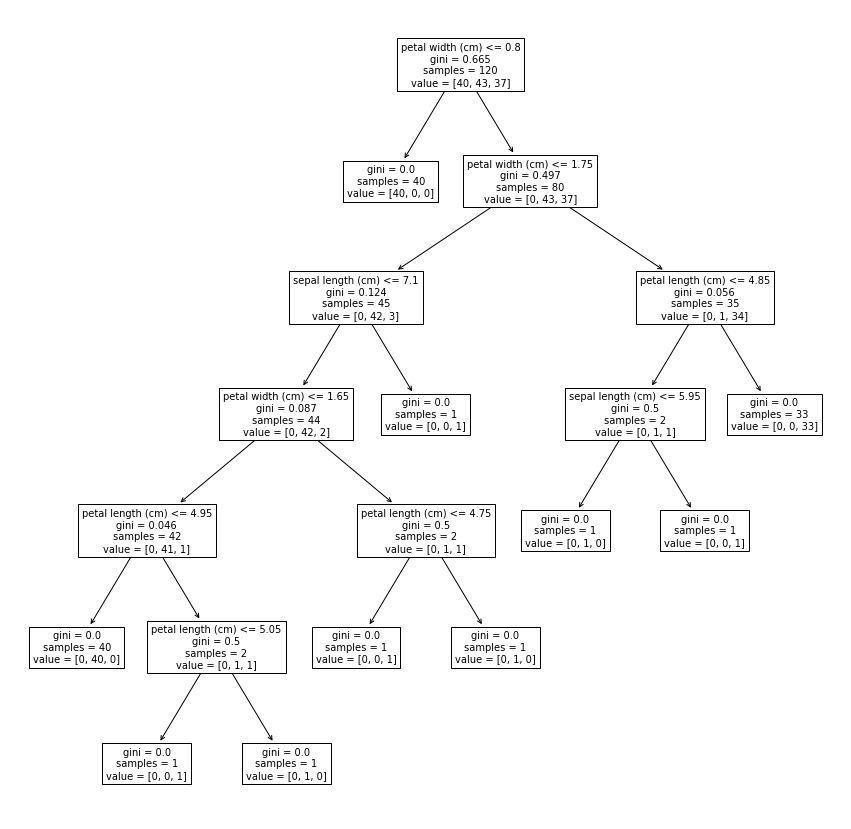

In [196]:
pl = tree.plot_tree(clf, feature_names = list(X_train.columns)) 

In [197]:
print(tree.export_text(clf, feature_names = list(X_train.columns)))

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- sepal length (cm) <= 7.10
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |   |--- petal length (cm) <= 5.05
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- petal length (cm) >  5.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- petal length (cm) <= 4.75
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal length (cm) >  4.75
|   |   |   |   |   |--- class: 1
|   |   |--- sepal length (cm) >  7.10
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- 

### Create a tree with restricted depth

Set hyperparameter `max_depth` to 3.

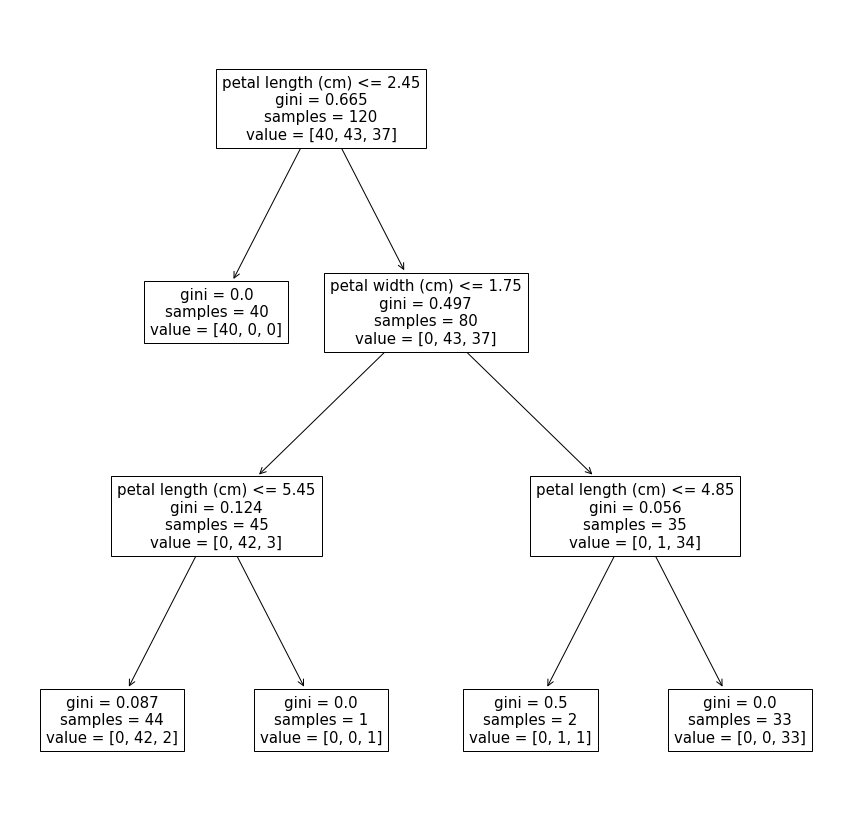

In [198]:
clf2 = tree.DecisionTreeClassifier(max_depth = 3)
clf2 = clf2.fit(X_train, y_train)
pl = tree.plot_tree(clf2, feature_names = list(X_train.columns))

## Test on the test data

In [199]:
pred = clf.predict(X_test)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))

y_test:	 [1, 2, 2, 1, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0]
pred:	 [1, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0]


Calculate accuracy on the test data

In [200]:
accuracy_score(pred, y_test)

0.9333333333333333

## Cross-validation

Use cross validation to estimate accuracy.

In [201]:
scores = cross_val_score(clf, X, y, cv = 10)
print(scores)

print("Cross validated accuracy:", scores.mean())

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
Cross validated accuracy: 0.9533333333333334
